<a href="https://colab.research.google.com/github/dharaneesh9371/nothing/blob/main/Copy_of_pratical_program.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ***program 1 ***

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# Training data (XOR problem)
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=np.float32)
y = np.array([[0], [1], [1], [0]], dtype=np.float32)

# Define the Neural Network Model
model = keras.Sequential([
    keras.layers.Dense(4, activation='sigmoid', input_shape=(2,)),  # Hidden layer
    keras.layers.Dense(1, activation='sigmoid')  # Output layer
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model and store history
history = model.fit(X, y, epochs=5000, verbose=0)  # Silent training

# Test the model
predictions = model.predict(X)

# Print predictions
print("\nFinal Predictions:")
print(np.round(predictions))  # Rounding to 0 or 1

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step

Final Predictions:
[[0.]
 [1.]
 [1.]
 [0.]]


**program 2 **

In [ ]:
import tensorflow as tf
import numpy as np

# XOR data
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=np.float32)
y = np.array([[0], [1], [1], [0]], dtype=np.float32)

# Track best model parameters
best_accuracy = 0
best_params = {}

# Grid search parameters
neurons_options = [2, 4, 8]
learning_rate_options = [0.01, 0.1]
activation_options = ['sigmoid', 'relu']

# Manual grid search implementation
for neurons in neurons_options:
    for learning_rate in learning_rate_options:
        for activation in activation_options:
            # Create and compile model
            model = tf.keras.Sequential([
                tf.keras.layers.Dense(neurons, activation=activation, input_shape=(2,)),
                tf.keras.layers.Dense(1, activation='sigmoid')
            ])

            model.compile(
                optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                loss='binary_crossentropy',
                metrics=['accuracy']
            )

            # Train model
            history = model.fit(X, y, epochs=500, verbose=0)

            # Evaluate model
            _, accuracy = model.evaluate(X, y, verbose=0)

            # Track best parameters
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_params = {
                    'neurons': neurons,
                    'learning_rate': learning_rate,
                    'activation': activation
                }

            print(f"Neurons: {neurons}, LR: {learning_rate}, Activation: {activation}, Accuracy: {accuracy:.4f}")

print(f"\nBest parameters: {best_params}")
print(f"Best accuracy: {best_accuracy:.4f}")

# Create final model with best parameters
final_model = tf.keras.Sequential([
    tf.keras.layers.Dense(best_params['neurons'], activation=best_params['activation'], input_shape=(2,)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

final_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=best_params['learning_rate']),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Train final model
final_model.fit(X, y, epochs=1000, verbose=0)

# Test predictions
predictions = final_model.predict(X)
print("\nFinal predictions (rounded):")
print(np.round(predictions))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Neurons: 2, LR: 0.01, Activation: sigmoid, Accuracy: 1.0000
Neurons: 2, LR: 0.01, Activation: relu, Accuracy: 0.7500
Neurons: 2, LR: 0.1, Activation: sigmoid, Accuracy: 1.0000
Neurons: 2, LR: 0.1, Activation: relu, Accuracy: 0.7500
Neurons: 4, LR: 0.01, Activation: sigmoid, Accuracy: 1.0000
Neurons: 4, LR: 0.01, Activation: relu, Accuracy: 1.0000
Neurons: 4, LR: 0.1, Activation: sigmoid, Accuracy: 1.0000
Neurons: 4, LR: 0.1, Activation: relu, Accuracy: 0.7500
Neurons: 8, LR: 0.01, Activation: sigmoid, Accuracy: 1.0000
Neurons: 8, LR: 0.01, Activation: relu, Accuracy: 1.0000
Neurons: 8, LR: 0.1, Activation: sigmoid, Accuracy: 1.0000
Neurons: 8, LR: 0.1, Activation: relu, Accuracy: 1.0000

Best parameters: {'neurons': 2, 'learning_rate': 0.01, 'activation': 'sigmoid'}
Best accuracy: 1.0000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step

Final predictions (rounded):
[[0.]
 [1.]
 [1.]
 [0.]]


**program 3
**

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test Accuracy: 0.9904


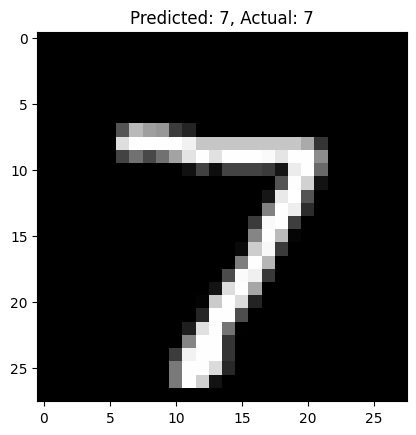

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Load and preprocess MNIST data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train.reshape(-1, 28, 28, 1) / 255.0, x_test.reshape(-1, 28, 28, 1) / 255.0

# Build CNN model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile and train
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test), verbose=0)

# Evaluate and visualize
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy: {test_acc:.4f}")

# Show sample prediction
index = 0
predictions = model.predict(x_test, verbose=0)
plt.imshow(x_test[index].reshape(28,28), cmap='gray')
plt.title(f"Predicted: {np.argmax(predictions[index])}, Actual: {y_test[index]}")
plt.show()

In [ ]:
pip install tensorflow fastapi uvicorn numpy pillow python-multipart


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 6.2 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

# Load the MNIST dataset
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the dataset
x_train, x_test = x_train / 255.0, x_test / 255.0

# Reshape for CNN input
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Define the CNN Model
model = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')  # 10 output classes
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

# Save the trained model
model.save("mnist_model.h5")

print("✅ Model training complete and saved as 'mnist_model.h5'")


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 65s 33ms/step - accuracy: 0.9116 - loss: 0.2820 - val_accuracy: 0.9869 - val_loss: 0.0415
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 77s 31ms/step - accuracy: 0.9870 - loss: 0.0433 - val_accuracy: 0.9878 - val_loss: 0.0380
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 30ms/step - accuracy: 0.9914 - loss: 0.0267 - val_accuracy: 0.9902 - val_loss: 0.0277
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 30ms/step - accuracy: 0.9942 - loss: 0.0184 - val_accuracy: 0.9902 - val_loss: 0.0319
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 29ms/step - accuracy: 0.9961 - loss: 0.0130 - val_accuracy: 0.9893 - val_loss: 0.0346


✅ Model training complete and saved as 'mnist_model.h5'


program 5 autoencoder

Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - loss: 0.3367 - val_loss: 0.1518
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.1429 - val_loss: 0.1203
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.1191 - val_loss: 0.1106
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 0.1103 - val_loss: 0.1047
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - loss: 0.1055 - val_loss: 0.1010
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


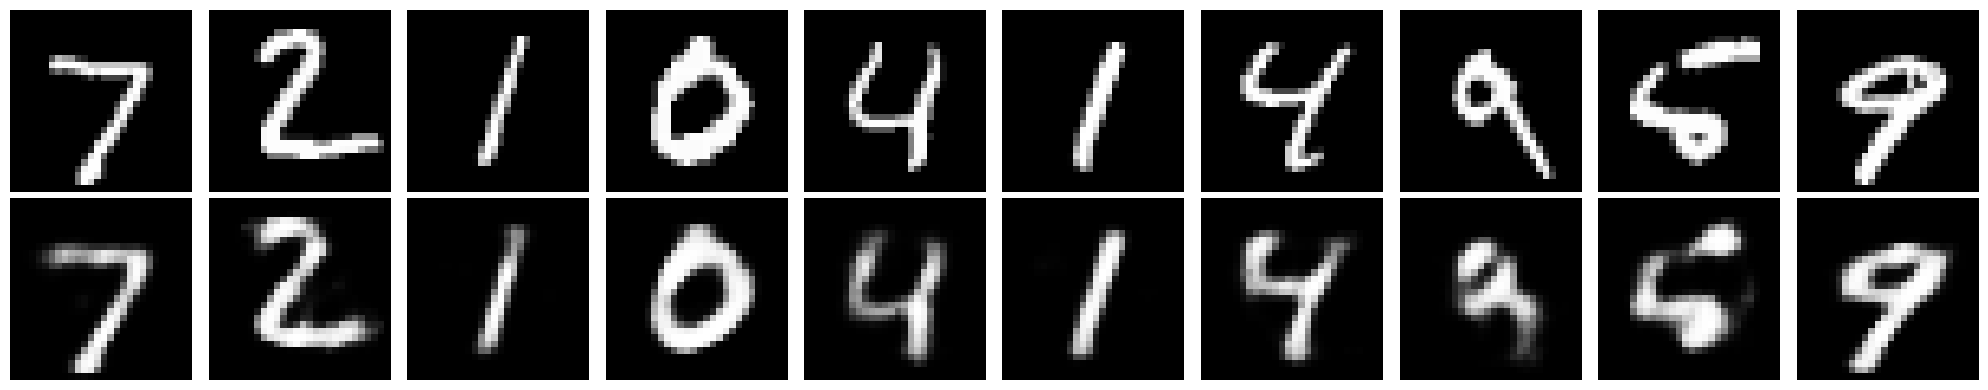

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Load and prepare MNIST data
(x_train, _), (x_test, _) = tf.keras.datasets.mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = x_train.reshape(len(x_train), 784)
x_test = x_test.reshape(len(x_test), 784)

# Create autoencoder model
autoencoder = tf.keras.Sequential([
    # Encoder
    tf.keras.layers.Dense(128, activation='relu', input_shape=(784,)),
    tf.keras.layers.Dense(32, activation='relu'),  # Bottleneck
    # Decoder
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(784, activation='sigmoid')
])

# Compile and train
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train, x_train, epochs=5, batch_size=256, validation_data=(x_test, x_test), verbose=1)

# Test and visualize
decoded_imgs = autoencoder.predict(x_test[:10])

# Display original vs reconstructed
plt.figure(figsize=(20, 4))
for i in range(10):
    # Original
    plt.subplot(2, 10, i+1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
    # Reconstruction
    plt.subplot(2, 10, i+11)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
plt.tight_layout()
plt.show()

program 6